# Car Deal Classification

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
train=pd.read_csv("E:/Study & Work/5th Sem Books/CS550- Machine Learning/Assignments/2/training_data.csv")

In [5]:
train

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,vhigh,med,2,4,small,low,Bad_deal
1,vhigh,med,5more,4,small,low,Bad_deal
2,med,vhigh,5more,4,small,low,Bad_deal
3,high,high,3,2,med,med,Bad_deal
4,vhigh,vhigh,5more,4,small,med,Bad_deal
...,...,...,...,...,...,...,...
1549,high,vhigh,4,2,small,low,Bad_deal
1550,med,vhigh,4,more,med,high,Bad_deal
1551,vhigh,low,4,4,big,med,Bad_deal
1552,low,vhigh,3,more,small,high,Bad_deal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Buying_Cost          1554 non-null   object
 1   Maintainance_Cost    1554 non-null   object
 2   Number_of_doors      1554 non-null   object
 3   Number_of_Passenger  1554 non-null   object
 4   Luggage_Space        1554 non-null   object
 5   Safety_Features      1554 non-null   object
 6   How_is_the_deal      1554 non-null   object
dtypes: object(7)
memory usage: 85.1+ KB


In [7]:
train.isnull().sum()

Buying_Cost            0
Maintainance_Cost      0
Number_of_doors        0
Number_of_Passenger    0
Luggage_Space          0
Safety_Features        0
How_is_the_deal        0
dtype: int64

In [8]:
for x in train.columns:
    print(x,train[x].unique())

Buying_Cost ['vhigh' 'med' 'high' 'low']
Maintainance_Cost ['med' 'vhigh' 'high' 'low']
Number_of_doors ['2' '5more' '3' '4']
Number_of_Passenger ['4' '2' 'more']
Luggage_Space ['small' 'med' 'big']
Safety_Features ['low' 'med' 'high']
How_is_the_deal ['Bad_deal' 'Nice_deal']


In [9]:
test=pd.read_csv("E:/Study & Work/5th Sem Books/CS550- Machine Learning/Assignments/2/testing_data.csv")
test

,Deal_num,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,0,low,low,5more,more,big,high
1,1,low,low,2,2,small,high
2,2,low,med,5more,4,med,low
3,3,low,low,4,2,big,low
4,4,low,low,4,2,med,high
...,...,...,...,...,...,...,...
169,169,low,med,4,2,small,low
170,170,low,med,5more,2,small,med
171,171,low,med,5more,more,big,low
172,172,low,high,5more,4,small,low


In [10]:
test.drop("Deal_num",axis="columns",inplace=True)

In [11]:
test.shape

(174, 6)

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Buying_Cost          174 non-null    object
 1   Maintainance_Cost    174 non-null    object
 2   Number_of_doors      174 non-null    object
 3   Number_of_Passenger  174 non-null    object
 4   Luggage_Space        174 non-null    object
 5   Safety_Features      174 non-null    object
dtypes: object(6)
memory usage: 8.3+ KB


In [13]:
for x in test.columns:
    print(x,test[x].unique())

Buying_Cost ['low']
Maintainance_Cost ['low' 'med' 'high']
Number_of_doors ['5more' '2' '4' '3']
Number_of_Passenger ['more' '2' '4']
Luggage_Space ['big' 'small' 'med']
Safety_Features ['high' 'low' 'med']


In [14]:
data=pd.concat([train,test])
data

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,vhigh,med,2,4,small,low,Bad_deal
1,vhigh,med,5more,4,small,low,Bad_deal
2,med,vhigh,5more,4,small,low,Bad_deal
3,high,high,3,2,med,med,Bad_deal
4,vhigh,vhigh,5more,4,small,med,Bad_deal
...,...,...,...,...,...,...,...
169,low,med,4,2,small,low,NaN
170,low,med,5more,2,small,med,NaN
171,low,med,5more,more,big,low,NaN
172,low,high,5more,4,small,low,NaN


In [18]:
label_encoder=LabelEncoder()
for x in data.columns:
    data[x]=label_encoder.fit_transform(data[x])


In [19]:
data

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,3,2,0,1,2,1,0
1,3,2,3,1,2,1,0
2,2,3,3,1,2,1,0
3,0,0,1,0,1,2,0
4,3,3,3,1,2,2,0
...,...,...,...,...,...,...,...
169,1,2,2,0,2,1,2
170,1,2,3,0,2,2,2
171,1,2,3,2,0,1,2
172,1,0,3,1,2,1,2


In [20]:
#splitting into original train and test datasets
train=data[0:1554]
test=data[1554::]

<AxesSubplot:xlabel='How_is_the_deal', ylabel='count'>

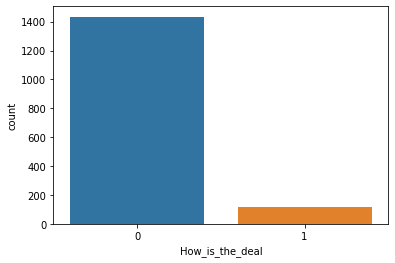

In [23]:
sns.countplot(x ='How_is_the_deal', data = train)

In [24]:
train['How_is_the_deal'].value_counts()

0    1434
1     120
Name: How_is_the_deal, dtype: int64

In [25]:
x=train.drop('How_is_the_deal',axis="columns")
y=train['How_is_the_deal']

**Unbalanced data so over-sampling the minor class**

In [26]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy="minority")
xn,yn=smote.fit_resample(x,y)

yn.value_counts()


0    1434
1    1434
Name: How_is_the_deal, dtype: int64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(xn,yn,random_state=42,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2007, 6), (861, 6), (2007,), (861,))

**Decision Tree Classifier**

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree=tree.fit(x_train,y_train)
print(tree.score(x_train,y_train))
pred=tree.predict(x_test)

0.9995017438963627


In [31]:
test

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,1,1,3,2,0,0,2
1,1,1,0,0,2,0,2
2,1,2,3,1,1,1,2
3,1,1,2,0,0,1,2
4,1,1,2,0,1,0,2
...,...,...,...,...,...,...,...
169,1,2,2,0,2,1,2
170,1,2,3,0,2,2,2
171,1,2,3,2,0,1,2
172,1,0,3,1,2,1,2


In [32]:
test=test.drop("How_is_the_deal",axis="columns")

In [33]:
test

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,1,1,3,2,0,0
1,1,1,0,0,2,0
2,1,2,3,1,1,1
3,1,1,2,0,0,1
4,1,1,2,0,1,0
...,...,...,...,...,...,...
169,1,2,2,0,2,1
170,1,2,3,0,2,2
171,1,2,3,2,0,1
172,1,0,3,1,2,1


In [34]:
test_predictions=tree.predict(test)

In [35]:
test_predict=pd.DataFrame({"Predicted_Deal":test_predictions})
test_predict

,Predicted_Deal
0,1
1,0
2,1
3,0
4,0
...,...
169,0
170,0
171,1
172,0


In [36]:
test_predict=test_predict.replace({1:'Nice_deal',0:'Bad_deal'})
test_predict

,Predicted_Deal
0,Nice_deal
1,Bad_deal
2,Nice_deal
3,Bad_deal
4,Bad_deal
...,...
169,Bad_deal
170,Bad_deal
171,Nice_deal
172,Bad_deal


In [37]:
final=pd.concat([test,test_predict],axis="columns")
final

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,Predicted_Deal
0,1,1,3,2,0,0,Nice_deal
1,1,1,0,0,2,0,Bad_deal
2,1,2,3,1,1,1,Nice_deal
3,1,1,2,0,0,1,Bad_deal
4,1,1,2,0,1,0,Bad_deal
...,...,...,...,...,...,...,...
169,1,2,2,0,2,1,Bad_deal
170,1,2,3,0,2,2,Bad_deal
171,1,2,3,2,0,1,Nice_deal
172,1,0,3,1,2,1,Bad_deal


<AxesSubplot:xlabel='Predicted_Deal', ylabel='count'>

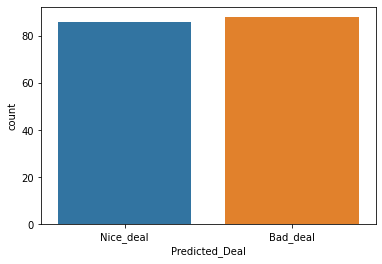

In [38]:
sns.countplot(x="Predicted_Deal",data=final)

In [39]:
final['Predicted_Deal'].value_counts()

Bad_deal     88
Nice_deal    86
Name: Predicted_Deal, dtype: int64